Take Breast Cancer Wisconsin Dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
# Importing the dataset
ds1 = pd.read_csv(r'C:\Users\amits\OneDrive\Desktop\DataScience\end to end data sets\breast-cancer-data.csv')
ds1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Dropping unwanted columns
ds1 = ds1.drop(columns='id')
ds1 = ds1.drop(columns='Unnamed: 32')

In [4]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [5]:
# Change the data type of target variable column
cat_cols = []
for cols in ds1.select_dtypes("object"):
    cat_cols.append(cols)


In [6]:
ds1[cat_cols] = ds1[cat_cols].astype("category")

In [7]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null category
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569

Perform Univariate analysis w.r.t to target labels ( M: Malignant, B:Benign) and analysis the distribution of data across both the labels

In [8]:
ds1.diagnosis.value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

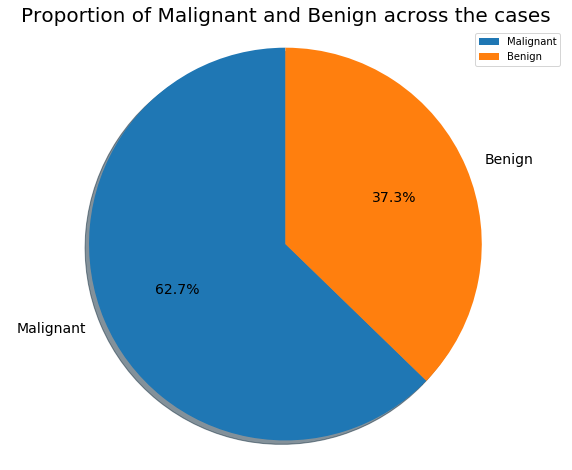

In [9]:
# Univariate analysis on target variable
labels = 'Malignant','Benign'
sizes = [ds1.diagnosis[ds1['diagnosis']=='B'].count(), ds1.diagnosis[ds1['diagnosis']=='M']
         .count()]

fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of Malignant and Benign across the cases",size=20)
plt.show()

Perform Bi-variate analysis on atleast 5-6 features

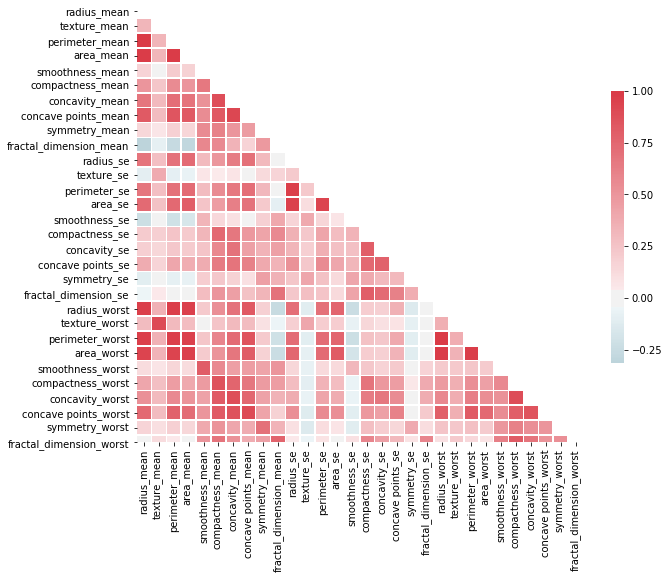

In [10]:
# Bi-variate analysis using correlation heatmap
corr = ds1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, linewidth=.6,cbar_kws={"shrink":.5})

Univriate analysis 

In [11]:
dataM=ds1[ds1['diagnosis'] == "M"]
dataB=ds1[ds1['diagnosis'] == "B"]

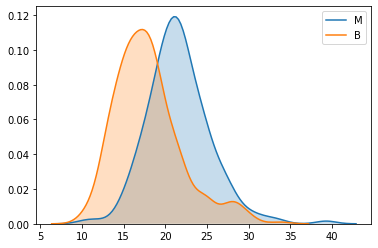

In [12]:
# Texture mean
sns.kdeplot(dataM.texture_mean, shade=True, label= "M");
sns.kdeplot(dataB.texture_mean, shade=True, label= "B");

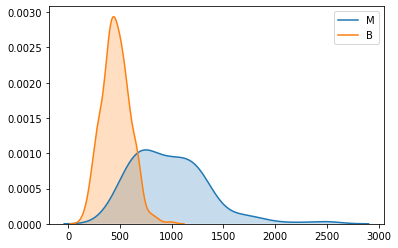

In [13]:
# Area mean
sns.kdeplot(dataM.area_mean, shade=True, label= "M");
sns.kdeplot(dataB.area_mean, shade=True, label= "B");

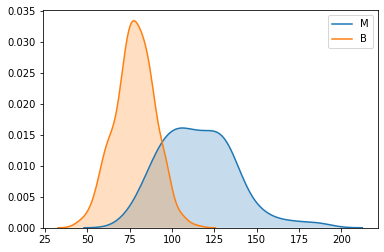

In [14]:
# Perimeter mean
sns.kdeplot(dataM.perimeter_mean, shade=True, label= "M");
sns.kdeplot(dataB.perimeter_mean, shade=True, label= "B");

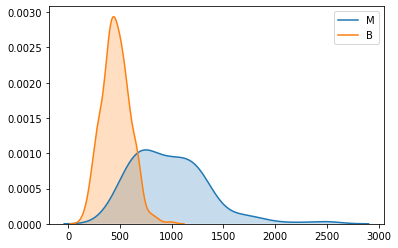

In [15]:
# Area mean
sns.kdeplot(dataM.area_mean, shade=True, label= "M");
sns.kdeplot(dataB.area_mean, shade=True, label= "B");

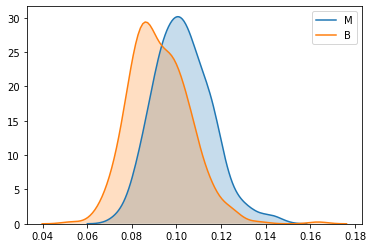

In [16]:
# Smoothness mean
sns.kdeplot(dataM.smoothness_mean, shade=True, label= "M");
sns.kdeplot(dataB.smoothness_mean, shade=True, label= "B");

Bivariate analysis of the features

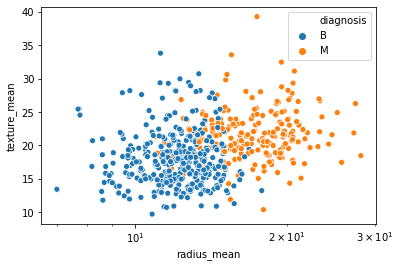

In [17]:
# Texture mean vs Radius mean
stplot = sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", data=ds1);
stplot.set(xscale="log");

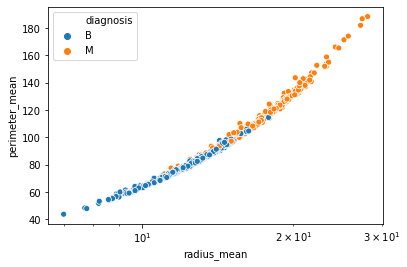

In [18]:
# Radius mean vs Texture mean
stplot = sns.scatterplot(x="radius_mean", y="perimeter_mean", hue="diagnosis", data=ds1);
stplot.set(xscale="log");

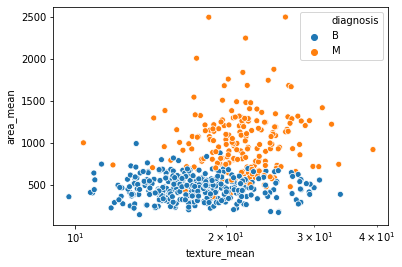

In [19]:
# Texture mean vs Area mean
stplot = sns.scatterplot(x="texture_mean", y="area_mean", hue="diagnosis", data=ds1);
stplot.set(xscale="log");

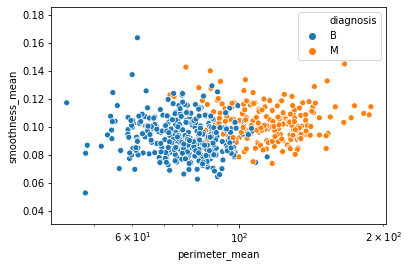

In [20]:
# Perimeter mean vs Smoothness mean
stplot = sns.scatterplot(x="perimeter_mean", y="smoothness_mean", hue="diagnosis", data=ds1);
stplot.set(xscale="log");

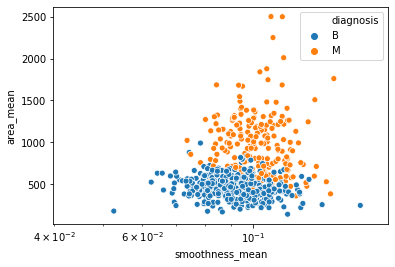

In [21]:
# Smoothness mean vs Area mean
stplot = sns.scatterplot(x="smoothness_mean", y="area_mean", hue="diagnosis", data=ds1);
stplot.set(xscale="log");

Perform Feature Engineering, atleast 2-3 features

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# Split features and target
ds_target = ds1.iloc[:,:1]
ds_features = ds1.iloc[:,1:]

In [24]:
# Calculating VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ds_features.values,i) for i in range(ds_features.shape[1])]
vif["features"] = ds_features.columns

In [25]:
# Inspecting VIF
vif.round(1)

,VIF Factor,features
0,63306.2,radius_mean
1,251.0,texture_mean
2,58123.6,perimeter_mean
3,1287.3,area_mean
4,393.4,smoothness_mean
5,201.0,compactness_mean
6,157.9,concavity_mean
7,154.2,concave points_mean
8,184.4,symmetry_mean
9,629.7,fractal_dimension_mean


In [63]:
# Encoding categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
ds_target = labelencoder_Y.fit_transform(ds_target)

In [64]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ds_features = sc.fit_transform(ds_features)

In [65]:
# Calculating p-values of the columns
import statsmodels.api as sm

In [66]:
from sklearn.model_selection import train_test_split
ds_features_train, ds_features_test, ds_target_train, ds_target_test = train_test_split(ds_features, ds_target, test_size=0.2, random_state=0)

In [30]:
ds_features_train = sm.add_constant(ds_features_train)
ds_features_test = sm.add_constant(ds_features_test)

In [31]:
model = sm.OLS(ds_target_train,ds_features_train).fit()
predictions = model.predict(ds_features_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     49.26
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.37e-118
Time:                        16:29:02   Log-Likelihood:                 29.042
No. Observations:                 455   AIC:                             3.917
Df Residuals:                     424   BIC:                             131.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3681      0.011     33.104      0.000       0.346       0.390
x1            -0.3425      0.728     -0.470      0.638      -1.774       1.089
x2             0.0497      0.039      1.271      0.204      -0.027       0.126
x3             0.1504      0.748      0.201      0.841      -1.321       1.622
x4             0.0606      0.200      0.303      0.762      -0.332       0.453
x5             0.0094      0.032      0.290      0.772      -0.054       0.073
x6            -0.2276      0.079     -2.885      0.004      -0.383      -0.073
x7             0.1477      0.097      1.515      0.130      -0.044       0.339
x8             0.0538      0.086      0.622      0.534      -0.116       0.224
x9             0.0246      0.022      1.102      0.271      -0.019       0.068
x10           -0.0054      0.044     -0.125      0.901      -0.091       0.080
x11            0.1966      0.101      1.953      0.051      -0.001       0.394
x12            0.0129      0.023      0.550      0.583      -0.033       0.059
x13           -0.1401      0.099     -1.411      0.159      -0.335       0.055
x14           -0.0099      0.070     -0.142      0.887      -0.147       0.127
x15            0.0272      0.026      1.061      0.289      -0.023       0.078
x16            0.0248      0.043      0.574      0.567      -0.060       0.110
x17           -0.0844      0.046     -1.843      0.066      -0.174       0.006
x18            0.0321      0.040      0.810      0.419      -0.046       0.110
x19            0.0295      0.026      1.137      0.256      -0.021       0.081
x20           -0.0604      0.036     -1.674      0.095      -0.131       0.011
x21            0.7894      0.313      2.523      0.012       0.174       1.405
x22            0.0067      0.048      0.139      0.889      -0.088       0.102
x23            0.1444      0.239      0.605      0.546      -0.325       0.614
x24           -0.6227      0.199     -3.132      0.002      -1.014      -0.232
x25            0.0192      0.040      0.483      0.629      -0.059       0.097
x26            0.0253      0.065      0.391      0.696      -0.102       0.153
x27            0.0502      0.068      0.740      0.460      -0.083       0.184
x28            0.0698      0.070      0.994      0.321      -0.068       0.208
x29           -0.0019      0.034     -0.057      0.955      -0.068       0.064
x30            0.0960      0.049      1.955      0.051      -0.001       0.193
==============================================================================
Omnibus:                       30.957   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.340
Skew:                           0.655   Prob(JB):                     2.12e-08
Kurtosis:                       3.384   Cond. No.                         340.
==

Buliding logistics regression model

In [32]:
# Split features and target
y = ds1.iloc[:,:1]
x = ds1.iloc[:,1:]

In [33]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
y.columns

Index(['diagnosis'], dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size=0.3, random_state=0)

In [37]:
logReg = LogisticRegression()

In [38]:
# Training the model and storing information learned from the data
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Predict labels for test data
y_pred = logReg.predict(x_test)

In [40]:
# Score method to get accuracy of model
score = logReg.score(x_test,y_test)
print("Accuracy score of model:",score.round(2))

Accuracy score of model: 0.96


In [41]:
# Precting Probabilities for test data
y_pred_probability = logReg.predict(x_test)

In [42]:
y_pred_probability

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

ROC and AUC curve

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[103,   5],
       [  1,  62]], dtype=int64)

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
logReg.predict_proba(x_test)[:,1]

array([9.92871621e-01, 3.10670748e-02, 2.87540576e-03, 2.04900431e-01,
       1.08226477e-04, 3.60898586e-03, 9.62408113e-03, 2.13199922e-03,
       4.11445615e-02, 3.26538852e-04, 4.98539078e-01, 1.53242245e-01,
       5.17147752e-03, 7.81606824e-01, 2.54866291e-01, 9.90847223e-01,
       2.12359471e-02, 9.99999996e-01, 9.98399202e-01, 1.00000000e+00,
       9.99972822e-01, 9.12164232e-01, 2.12086242e-03, 1.35100206e-02,
       9.91458921e-01, 1.44921900e-02, 2.80696328e-03, 8.34487369e-01,
       4.01420978e-03, 1.00000000e+00, 5.41225511e-04, 9.99999945e-01,
       4.08891329e-01, 9.99302259e-01, 2.91845823e-04, 9.98349282e-01,
       9.78557823e-02, 9.99997340e-01, 5.22477226e-03, 9.99581253e-01,
       9.32441390e-01, 6.96850256e-03, 9.97187673e-01, 1.20852405e-03,
       9.58868830e-01, 1.00000000e+00, 4.39543276e-04, 3.16628059e-02,
       1.49847161e-03, 9.99643683e-01, 9.99996630e-01, 7.38026340e-01,
       9.99999183e-01, 5.69644661e-03, 1.10264878e-02, 1.27609197e-03,
      

In [47]:
import numpy as np
#Threshold is 0.3
y_pred_th3 = np.where(logReg.predict_proba(x_test)[:,1]>0.3,1,0)
y_pred_th3

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [48]:
#Threshold is 0.2
y_pred_th2 = np.where(logReg.predict_proba(x_test)[:,1]>0.2,1,0)
y_pred_th2

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

In [50]:
# Encoding categorical variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [51]:
tpr, fpr, thresholds = roc_curve(y_test, logReg.predict_proba(x_test)[:,1])

In [52]:
tpr

array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
       0.01851852, 0.01851852, 0.12962963, 0.12962963, 1.        ])

In [53]:
fpr

array([0.        , 0.04761905, 0.80952381, 0.80952381, 0.95238095,
       0.95238095, 0.98412698, 0.98412698, 1.        , 1.        ])

In [54]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.65324454e-01, 9.58868830e-01,
       7.92073812e-01, 7.81606824e-01, 7.38026340e-01, 1.94672982e-01,
       1.59332376e-01, 1.08226477e-04])

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

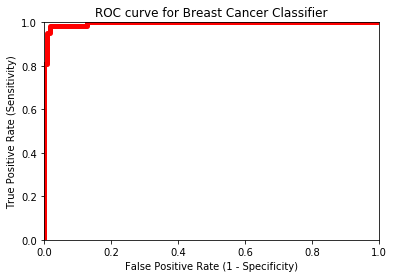

In [56]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test,logReg.predict_proba(x_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Breast Cancer Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import numpy as np

In [58]:
#Feature selection and Recursive feature elimination
from sklearn.feature_selection import RFE

In [59]:
#Select best feature 
rfe = RFE(logReg, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)
#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]

[ True  True False False  True False  True  True  True False  True  True
 False False False False False False False False  True  True  True False
 False False  True  True  True  True]
[ 1  1 11 16  1  6  1  1  1 10  1  1 12  3 14 13  5  8  9 15  1  1  1  7
  4  2  1  1  1  1]


Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Perform Fine-tuning to the "C" parameter.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

In [61]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [62]:
logReg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logReg, param_grid=param_grid, cv = 3, n_jobs=-1)
start_time = time.time()
grid_result = grid.fit(x, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.952548 using {'C': 2.0, 'dual': False, 'max_iter': 100}
Execution time: 9.278067350387573 ms


C:\Users\amits\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
